## Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
stem=PorterStemmer()
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()
stopwords=stopwords.words('english')
import tensorflow as tf
sns.set()

## Loading the training data

In [30]:
data=pd.read_csv('train.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## EDA

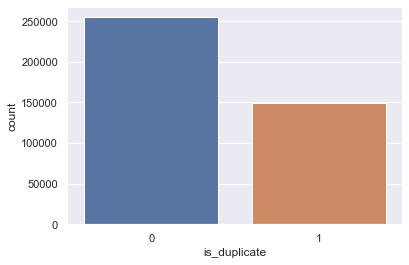

In [32]:
sns.countplot(data["is_duplicate"])
plt.show()

### Since there are 4 lack values, selecting first 10000 for our work for easy processing

In [33]:
data=data.head(10000)

### checking if the distribution is same

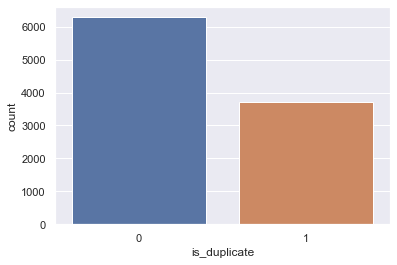

In [34]:
sns.countplot(data["is_duplicate"])
plt.show()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            10000 non-null  int64 
 1   qid1          10000 non-null  int64 
 2   qid2          10000 non-null  int64 
 3   question1     10000 non-null  object
 4   question2     10000 non-null  object
 5   is_duplicate  10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


## checking null values

In [36]:
data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

## checking unique question id

In [37]:
data["qid1"].nunique()

9813

In [38]:
data["qid2"].nunique()

9790

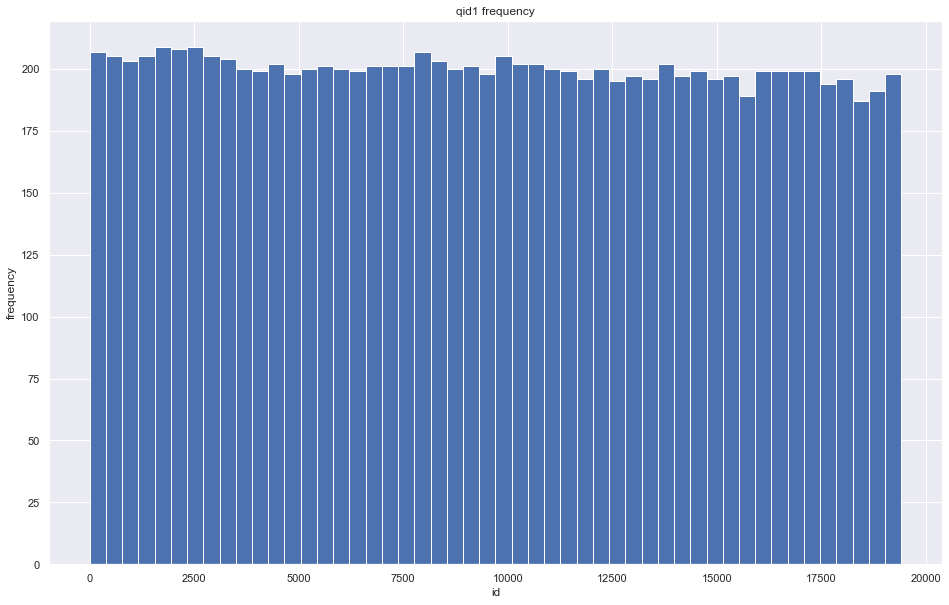

In [39]:
plt.figure(figsize = (16, 10))
plt.hist(data["qid1"], bins = 50)
plt.title("qid1 frequency")
plt.xlabel("id")
plt.ylabel("frequency")
plt.show()

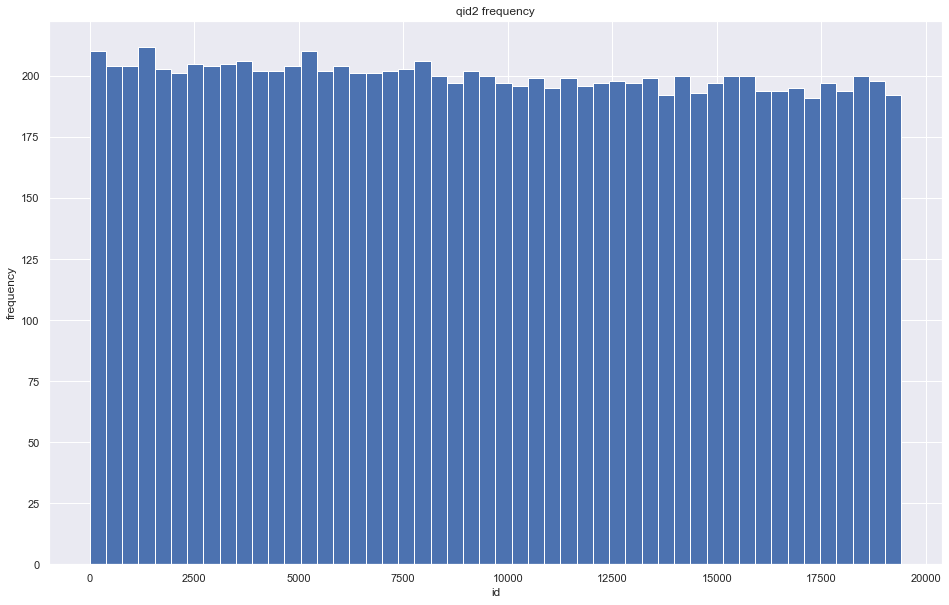

In [40]:
plt.figure(figsize = (16, 10))
plt.hist(data["qid2"], bins = 50)
plt.title("qid2 frequency")
plt.xlabel("id")
plt.ylabel("frequency")
plt.show()

## defining function for cleaning

In [41]:
def cleaning(ques):
    cleaned=[]
    pattern=r"[^A-Za-z]"
    for k in ques:
        k=re.sub(pattern," ",k)
        k=word_tokenize(k)
        k=[x for x in k if x not in stopwords]
        k=[lemmatizer.lemmatize(x) for x in k]
        cleaned.append(" ".join(k))
    return cleaned

In [42]:
data['question1']=cleaning(data['question1'])

In [43]:
data['question2']=cleaning(data['question2'])

In [44]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What step step guide invest share market india,What step step guide invest share market,0
1,1,3,4,What story Kohinoor Koh Noor Diamond,What would happen Indian government stole Kohi...,0
2,2,5,6,How I increase speed internet connection using...,How Internet speed increased hacking DNS,0
3,3,7,8,Why I mentally lonely How I solve,Find remainder math math divided,0
4,4,9,10,Which one dissolve water quikly sugar salt met...,Which fish would survive salt water,0


## getting all the words from question1 and question2

In [45]:
text = data["question1"].to_string().lower()+data["question2"].to_string().lower()

## building the word cloud

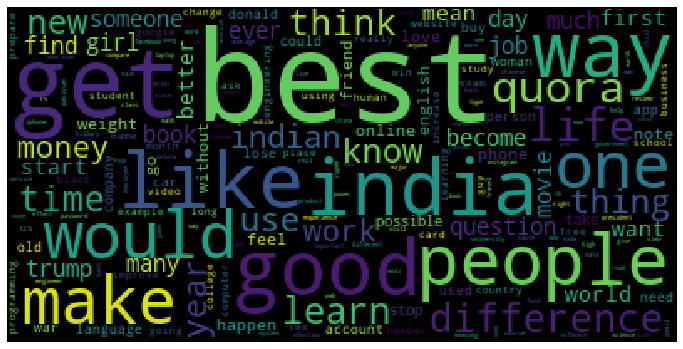

In [46]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords)).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [47]:
len(text)

1159998

## cleaning text for term frequency

In [48]:
text = re.sub(r"[^A-Za-z]"," ",text)
text = word_tokenize(text)
text = [x for x in text if x not in stopwords]

In [49]:
text[:10]

['step',
 'step',
 'guide',
 'invest',
 'share',
 'market',
 'india',
 'story',
 'kohinoor',
 'koh']

In [50]:
clean_text = []
for i in text:
    if i not in stopwords and i.isalnum():
        clean_text.append(i)
print(len(clean_text))

92286


In [51]:
clean_text[:10]

['step',
 'step',
 'guide',
 'invest',
 'share',
 'market',
 'india',
 'story',
 'kohinoor',
 'koh']

## Calculating term frequency

In [52]:
count_dic = {}
for i in set(clean_text):
    count_dic[i] = clean_text.count(i)

### Sorting the word with their term freqency in descending order

In [53]:
sorted_values = list(sorted(count_dic.values(), reverse = True))[:30]
sorted_word_dic = {}
for i in range(30):
    for j in count_dic.keys():
        if count_dic[j] == sorted_values[i]:
            sorted_word_dic[j] = sorted_values[i]
    

In [54]:
sorted_word_dic

{'best': 1720,
 'get': 905,
 'india': 565,
 'way': 556,
 'good': 550,
 'like': 547,
 'people': 546,
 'make': 460,
 'would': 457,
 'one': 449,
 'quora': 385,
 'life': 378,
 'difference': 366,
 'learn': 342,
 'think': 312,
 'time': 310,
 'year': 294,
 'use': 281,
 'know': 281,
 'thing': 281,
 'money': 270,
 'work': 268,
 'question': 267,
 'new': 265,
 'much': 260,
 'someone': 256,
 'ever': 252,
 'book': 243,
 'many': 241,
 'become': 239}

## ploting top 30 most frequent words

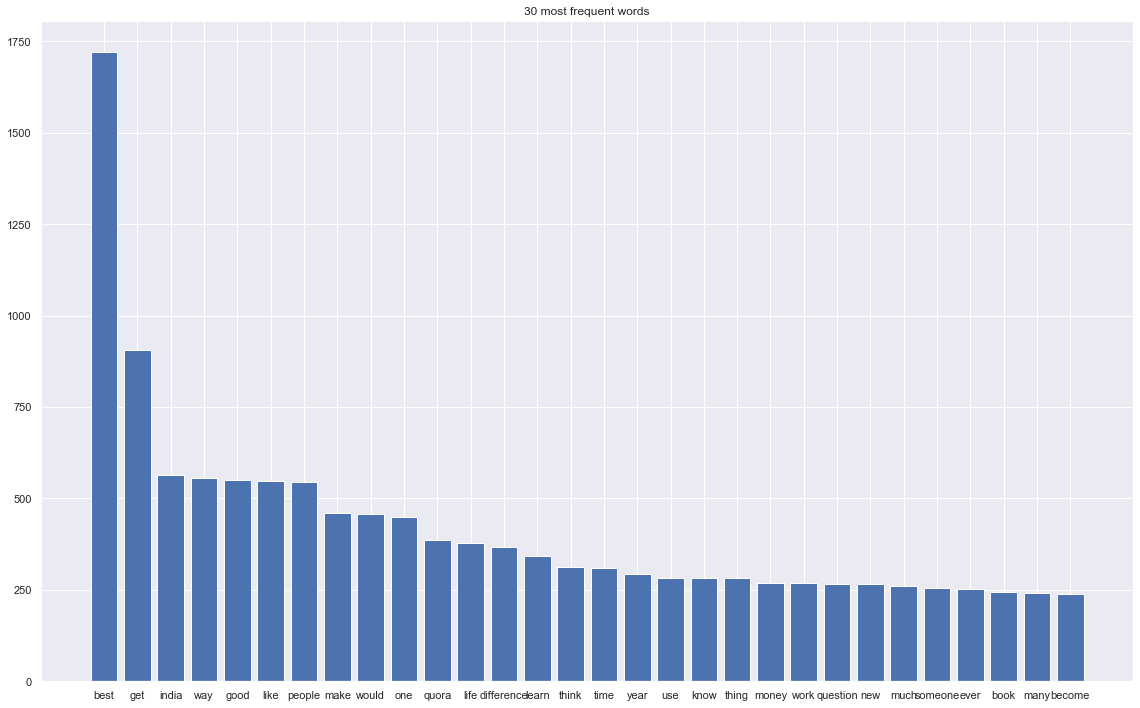

In [55]:
plt.figure(figsize = (16,10))
plt.bar(sorted_word_dic.keys(), sorted_word_dic.values())
plt.title("30 most frequent words")
plt.tight_layout()
plt.show()

## TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(np.array(data['question1'].values.tolist()+data['question2'].values.tolist()))
tf1=vectorizer.transform(data['question1'])
tf2=vectorizer.transform(data['question2'])
tf1 = tf1.toarray()
tf2 = tf2.toarray()
tx = np.hstack((tf1,tf2))
y=data['is_duplicate'].values

In [58]:
from sklearn.model_selection import train_test_split
t_train, t_test, l_train, l_test = train_test_split(tx, y)

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(t_train, l_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(l_test, clf.predict(t_test))

0.7336

In [64]:
tx = tx.reshape(-1, tx.shape[1], 1)

In [65]:
from sklearn.model_selection import train_test_split
t_train, t_test, l_train, l_test = train_test_split(tx, y)

In [67]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=tx.shape[1:]),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(8,activation="relu"),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 26136)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                836384    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 836,666
Trainable params: 836,666
Non-trainable params: 0
_________________________________________________________________


In [68]:
history=model.fit(t_train, l_train, epochs=5,validation_data=(t_test,l_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/5
7500/7500 [==============================] - 8s 1ms/sample - loss: 0.6421 - acc: 0.6325 - val_loss: 0.5991 - val_acc: 0.6932
Epoch 2/5
7500/7500 [==============================] - 4s 548us/sample - loss: 0.4831 - acc: 0.7783 - val_loss: 0.5914 - val_acc: 0.7120
Epoch 3/5
7500/7500 [==============================] - 4s 516us/sample - loss: 0.3029 - acc: 0.8797 - val_loss: 0.6810 - val_acc: 0.7016
Epoch 4/5
7500/7500 [==============================] - 4s 527us/sample - loss: 0.1826 - acc: 0.9321 - val_loss: 0.7920 - val_acc: 0.7024
Epoch 5/5
7500/7500 [==============================] - 4s 526us/sample - loss: 0.1161 - acc: 0.9581 - val_loss: 0.9227 - val_acc: 0.7016


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


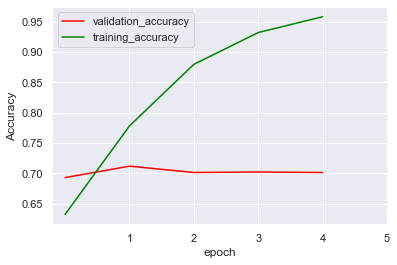

In [69]:
print(history.history.keys())
plt.plot(history.history['val_acc'],label="validation_accuracy",color="red")
plt.plot(history.history['acc'],label="training_accuracy",color="green")
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.xticks(range(1,6))
plt.legend()
plt.show()

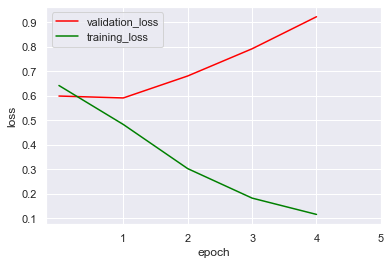

In [70]:
plt.plot(history.history['val_loss'],label="validation_loss",color="red")
plt.plot(history.history['loss'],label="training_loss",color="green")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.xticks(range(1,6))
plt.legend()
plt.show()

## word to vector

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(analyzer='word')
count.fit(np.array(data['question1'].values.tolist()+data['question2'].values.tolist()))
# count.fit(data['question2'].values.to_list())
feature1=count.transform(data['question1'])
feature2=count.transform(data['question2'])


## converting into numpy array

In [31]:
feature1 = feature1.toarray()
feature2 = feature2.toarray()

#### converting into single feature array

In [32]:
x=np.hstack((feature1,feature2))
y=data['is_duplicate']

In [33]:
x.shape

(10000, 26136)

#### reducing the memory

In [34]:
x = x.astype(np.uint8)

In [35]:
y.shape

(10000,)

In [36]:
y = y.astype(np.uint8)

## attempting with random forest

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
r_predict=clf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy',round(accuracy_score(y_test,r_predict)*100,4),'%')
print('confusion matrix\n',confusion_matrix(y_test,r_predict))

accuracy 69.84 %
confusion matrix
 [[1338  235]
 [ 519  408]]


In [ ]:
## atempting with genetic algorithm

In [ ]:
# from tpot import TPOTClassifier
# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(x_train, y_train)
# print(tpot.score(x_test, y_test))

## attempting with ANN

In [40]:
x.shape

(10000, 26136)

## reshaping feature vector for ANN

In [41]:
x = x.reshape(-1,x.shape[1],1)

In [42]:
x.shape

(10000, 26136, 1)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [44]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=x.shape[1:]),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(8,activation="relu"),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 26136)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                836384    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 836,666
Trainable params: 836,666
Non-trainable params: 0
________________________________________________________________

In [45]:
history=model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/5
7500/7500 [==============================] - 7s 878us/sample - loss: 0.6203 - acc: 0.6593 - val_loss: 0.5863 - val_acc: 0.7012
Epoch 2/5
7500/7500 [==============================] - 4s 574us/sample - loss: 0.4418 - acc: 0.7968 - val_loss: 0.6027 - val_acc: 0.6960
Epoch 3/5
7500/7500 [==============================] - 4s 578us/sample - loss: 0.2678 - acc: 0.8943 - val_loss: 0.7227 - val_acc: 0.6856
Epoch 4/5
7500/7500 [==============================] - 4s 564us/sample - loss: 0.1664 - acc: 0.9383 - val_loss: 0.8287 - val_acc: 0.6704
Epoch 5/5
7500/7500 [==============================] - 4s 568us/sample - loss: 0.1009 - acc: 0.9636 - val_loss: 0.9581 - val_acc: 0.6732


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


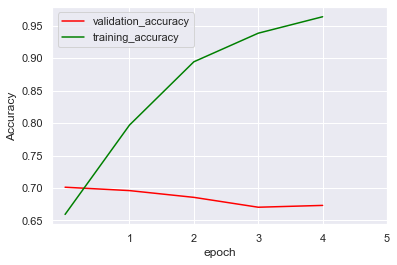

In [46]:
print(history.history.keys())
plt.plot(history.history['val_acc'],label="validation_accuracy",color="red")
plt.plot(history.history['acc'],label="training_accuracy",color="green")
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.xticks(range(1,6))
plt.legend()
plt.show()

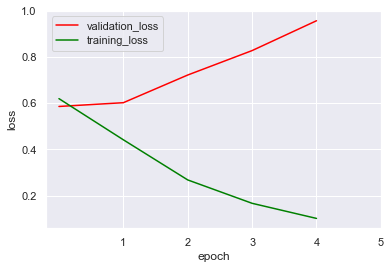

In [47]:
plt.plot(history.history['val_loss'],label="validation_loss",color="red")
plt.plot(history.history['loss'],label="training_loss",color="green")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.xticks(range(1,6))
plt.legend()
plt.show()

## post processing for sklearn evaluation

In [48]:
ann_predict = []
for i in model.predict(x_test):
    ann_predict.append(np.argmax(i))

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy',round(accuracy_score(y_test,ann_predict)*100,4),'%')
print('confusion matrix\n',confusion_matrix(y_test,ann_predict))

accuracy 67.32 %
confusion matrix
 [[1178  395]
 [ 422  505]]


### Adding cosine similarity

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_sim(x):
    countvec=CountVectorizer(analyzer='word')
    questions=[x.question1,x.question2]
    sparse_matrix=countvec.fit_transform(questions)
    similarity=cosine_similarity(sparse_matrix[0:1],sparse_matrix)
    return similarity[0][1]


In [51]:
data.loc[:,'similarity']=data.apply(get_cosine_sim,axis=1)

In [52]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,similarity
0,0,1,2,What step step guide invest share market india,What step step guide invest share market,0,0.948683
1,1,3,4,What story Kohinoor Koh Noor Diamond,What would happen Indian government stole Kohi...,0,0.615457
2,2,5,6,How I increase speed internet connection using...,How Internet speed increased hacking DNS,0,0.462910
3,3,7,8,Why I mentally lonely How I solve,Find remainder math math divided,0,0.000000
4,4,9,10,Which one dissolve water quikly sugar salt met...,Which fish would survive salt water,0,0.369274


### Adding Jaccard similarity

In [53]:
 ###jaccard similarity..

def jaccard_similarity(query,document):
    i=0
    values=[]
    while (i<=9999):
        #print(query[i])
        #print(document[i])
        intersection=set(query[i]).intersection(set(document[i]))
        union=set(query[i]).union(set(document[i]))
        jacsim=len(intersection)/len(union)
        values.append(jacsim)
        i=i+1
    return values


In [54]:
data['jacsim']=jaccard_similarity(data['question1'],data['question2'])

In [55]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,similarity,jacsim
0,0,1,2,What step step guide invest share market india,What step step guide invest share market,0,0.948683,1.000000
1,1,3,4,What story Kohinoor Koh Noor Diamond,What would happen Indian government stole Kohi...,0,0.615457,0.518519
2,2,5,6,How I increase speed internet connection using...,How Internet speed increased hacking DNS,0,0.462910,0.708333
3,3,7,8,Why I mentally lonely How I solve,Find remainder math math divided,0,0.000000,0.400000
4,4,9,10,Which one dissolve water quikly sugar salt met...,Which fish would survive salt water,0,0.369274,0.640000


In [56]:
data["q1len"] = data["question1"].apply(len)
data["q2len"] = data["question2"].apply(len)

In [57]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,similarity,jacsim,q1len,q2len
0,0,1,2,What step step guide invest share market india,What step step guide invest share market,0,0.948683,1.000000,46,40
1,1,3,4,What story Kohinoor Koh Noor Diamond,What would happen Indian government stole Kohi...,0,0.615457,0.518519,36,72
2,2,5,6,How I increase speed internet connection using...,How Internet speed increased hacking DNS,0,0.462910,0.708333,50,40
3,3,7,8,Why I mentally lonely How I solve,Find remainder math math divided,0,0.000000,0.400000,33,32
4,4,9,10,Which one dissolve water quikly sugar salt met...,Which fish would survive salt water,0,0.369274,0.640000,66,35


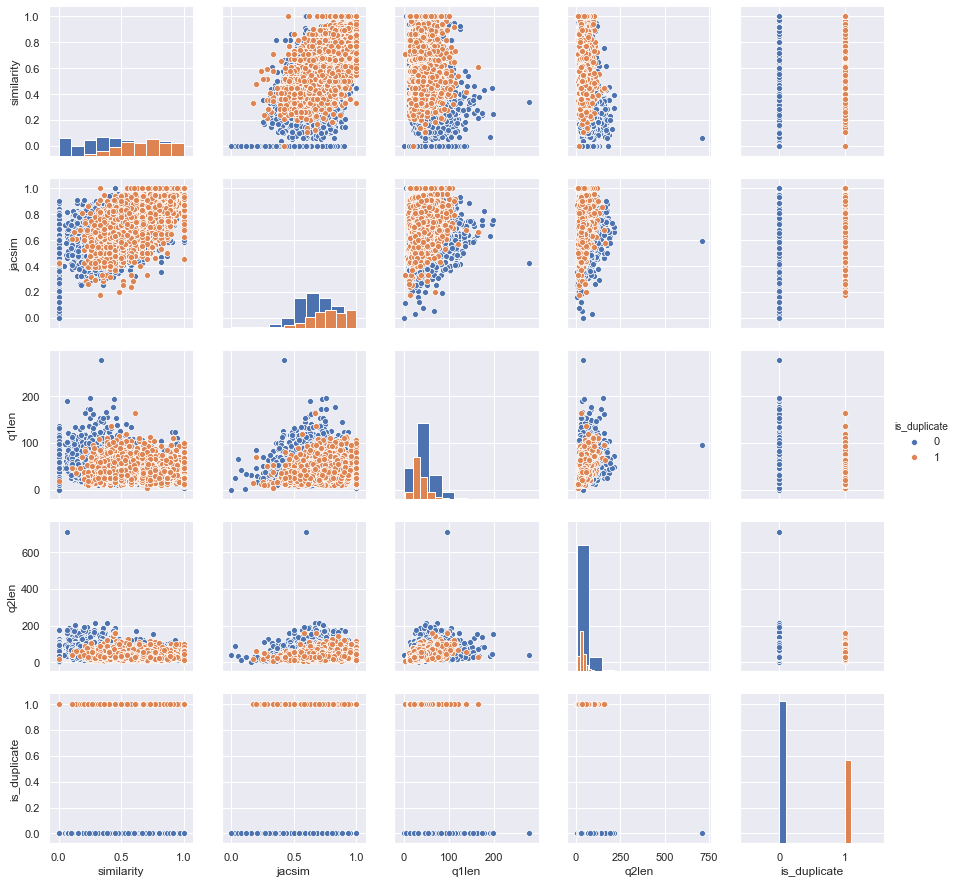

In [62]:
sns.pairplot(data[["similarity", "jacsim", "q1len", "q2len", "is_duplicate"]], hue = "is_duplicate", diag_kind = "hist")
plt.show()

In [63]:
cs=data['similarity']
ds=data['jacsim']

In [64]:
cs=np.expand_dims(cs,axis=1)

In [65]:
ds=np.expand_dims(ds,axis=1)

In [66]:
x1=np.hstack((feature1,feature2,cs,ds))

In [67]:
x1 = x1.astype(np.float16)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=0)

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
predict=clf.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predict=clf.predict(x_test)
print('accuracy',round(accuracy_score(y_test,y_predict)*100,4),'%')
print('confusion matrix\n',confusion_matrix(y_test,y_predict))

accuracy 73.88 %
confusion matrix
 [[1373  200]
 [ 453  474]]


In [71]:
x1.shape

(10000, 26138)

In [72]:
x1 = x1.reshape(-1,x1.shape[1],1)

In [73]:
x1.shape

(10000, 26138, 1)

## with ANN

In [74]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=x1.shape[1:]),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(32,activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 26138)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                836448    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 837,570
Trainable params: 837,570
Non-trainable params: 0
________________________________________________

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x1,y)

In [77]:
history=model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/5
7500/7500 [==============================] - 8s 1ms/sample - loss: 0.6194 - acc: 0.6524 - val_loss: 0.5430 - val_acc: 0.7220
Epoch 2/5
7500/7500 [==============================] - 5s 663us/sample - loss: 0.4332 - acc: 0.7992 - val_loss: 0.5512 - val_acc: 0.7248
Epoch 3/5
7500/7500 [==============================] - 6s 752us/sample - loss: 0.2689 - acc: 0.8856 - val_loss: 0.6592 - val_acc: 0.7084
Epoch 4/5
7500/7500 [==============================] - 6s 756us/sample - loss: 0.1667 - acc: 0.9364 - val_loss: 0.7961 - val_acc: 0.7096
Epoch 5/5
7500/7500 [==============================] - 6s 755us/sample - loss: 0.1058 - acc: 0.9627 - val_loss: 0.9533 - val_acc: 0.6940


In [78]:
model.evaluate(x_test,  y_test, verbose=2)

2500/2500 - 1s - loss: 0.9533 - acc: 0.6940


[0.9533157508015633, 0.694]

In [79]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

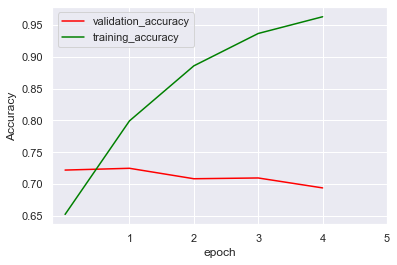

In [80]:
plt.plot(history.history['val_acc'],label="validation_accuracy",color="red")
plt.plot(history.history['acc'],label="training_accuracy",color="green")
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.xticks(range(1,6))
plt.legend()
plt.show()


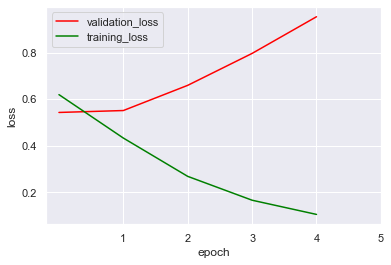

In [81]:
plt.plot(history.history['val_loss'],label="validation_loss",color="red")
plt.plot(history.history['loss'],label="training_loss",color="green")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.xticks(range(1,6))
plt.legend()
plt.show()


In [83]:
ann_predict = []
for i in model.predict(x_test):
    ann_predict.append(np.argmax(i))

## with CNN

In [99]:
cnnmodel = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(64,3, input_shape = x1.shape[1:]),
  tf.keras.layers.MaxPool1D(3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
cnnmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 26126, 64)         256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8708, 64)          0         
_________________________________________________________________
dense_9 (Dense)              (None, 8708, 32)          2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 8708, 32)          0         
_________________________________________________________________
dense_10 (Dense)             (None, 8708, 2)           66        
Total params: 2,402
Trainable params: 2,402
Non-trainable params: 0
_________________________________________________________________


In [100]:
history=cnnmodel.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/5
7500/7500 [==============================] - 273s 36ms/sample - loss: 0.6365 - acc: 0.6337 - val_loss: 0.6050 - val_acc: 0.6740
Epoch 2/5
7500/7500 [==============================] - 238s 32ms/sample - loss: 0.5489 - acc: 0.7081 - val_loss: 0.6168 - val_acc: 0.6700
Epoch 3/5
7500/7500 [==============================] - 237s 32ms/sample - loss: 0.4484 - acc: 0.7840 - val_loss: 0.6609 - val_acc: 0.6672
Epoch 4/5
7500/7500 [==============================] - 243s 32ms/sample - loss: 0.3587 - acc: 0.8289 - val_loss: 0.7447 - val_acc: 0.6656
Epoch 5/5
7500/7500 [==============================] - 236s 32ms/sample - loss: 0.2924 - acc: 0.8577 - val_loss: 0.8933 - val_acc: 0.6432


In [101]:
cnn_predict = []
for i in cnnmodel.predict(x_test):
    cnn_predict.append(np.argmax(i))